A test of EfficientNet implementation.  
https://github.com/tensorflow/tpu/tree/master/models/official/efficientnet

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Create the model and load the official weights.

In [1]:
import os
import warnings
import tensorflow as tf
import matplotlib.pyplot as plt
os.chdir('./drive/My Drive/Python/Research')
warnings.filterwarnings('ignore')
from modules.efficientnet import EfficientNet

eff_model = EfficientNet('efficientnet-b4')
eff_model.loading('models/efficientnet_b4/model.ckpt')

Process the image as the official code does.

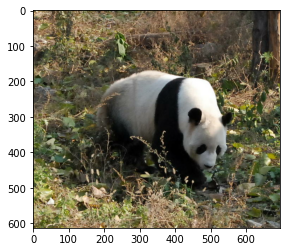

In [2]:
def image_decoding(image, size):
  shape1 = tf.image.extract_jpeg_shape(image)
  pad1 = tf.cast(((size/(size+32))*tf.cast(tf.minimum(shape1[0], shape1[1]), tf.float32)), tf.int32)
  height1 = ((shape1[0]-pad1)+1)//2
  width1 = ((shape1[1]-pad1)+1)//2
  crop1 = tf.stack([height1, width1, pad1, pad1])
  image1 = tf.image.decode_and_crop_jpeg(image, crop1, channels=3)
  return tf.compat.v1.image.resize_bicubic([image1], [size, size])[0]


def image_processing(image, size):
  image1 = tf.reshape(image_decoding(image, size), [size, size, 3])
  image1 = tf.image.convert_image_dtype(image1, tf.float32)
  image1 -= tf.constant([0.485*255, 0.456*255, 0.406*255], shape=[1, 1, 3], dtype=tf.float32)
  image1 /= tf.constant([0.229*255, 0.224*255, 0.225*255], shape=[1, 1, 3], dtype=tf.float32)
  return image1


image_read = tf.io.read_file('models/efficientnet_b4/files/panda.jpg')
image_input = image_processing(image_read, 380)
plt.imshow(tf.image.decode_jpeg(image_read, 3))

Extract predictions and features.

In [3]:
pred_class, feature_head, feature_mbconv = eff_model.propagating(tf.expand_dims(image_input, 0))
print(tf.nn.top_k(tf.nn.softmax(pred_class), 5))
print(feature_head)

TopKV2(values=<tf.Tensor: shape=(1, 5), dtype=float32, numpy=
array([[0.74869573, 0.0045555 , 0.00372131, 0.00247904, 0.00152582]],
      dtype=float32)>, indices=<tf.Tensor: shape=(1, 5), dtype=int32, numpy=array([[388, 295, 387, 296, 805]], dtype=int32)>)
tf.Tensor(
[[[[-2.77580708e-01 -1.58785760e-01 -2.26789996e-01 ... -2.57822782e-01
    -2.57241428e-01 -1.66163310e-01]
   [-2.78245628e-01 -2.13928103e-01 -2.78234720e-01 ... -2.78428704e-01
    -2.77784139e-01 -1.81721479e-01]
   [-2.78458416e-01 -2.21378475e-01 -2.77688295e-01 ... -2.61870891e-01
    -2.71523207e-01 -1.86074153e-01]
   ...
   [-2.76699007e-01 -2.13173345e-01 -2.77284831e-01 ... -2.74317980e-01
    -2.63768733e-01 -2.46581122e-01]
   [-2.77399123e-01 -1.71655878e-01 -2.78463513e-01 ... -2.58219123e-01
    -2.36203149e-01 -2.10283950e-01]
   [-2.59866506e-01 -1.37264952e-01 -2.15497136e-01 ... -1.96478486e-01
    -1.71926692e-01 -1.28098398e-01]]

  [[-2.55538821e-01 -1.51185796e-01 -2.42404327e-01 ... -2.19015956e